# Installing required libraries


In [ ]:
! pip install tqdm
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install ucimlrepo
! pip install missingno

# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from itertools import accumulate
from ucimlrepo import fetch_ucirepo

# Defining helper function

In [ ]:
def plot_histograms(X, y=None):
    """
    Creates distribution plots: histograms for numerical features and count plots for categorical features, optionally grouped by target variable
    """
    if y is not None:
        X = X.copy()  # Avoid modifying the original DataFrame
        X['label'] = y  # Add labels for grouping

    for col in X.columns:
        plt.figure(figsize=(8, 6))
        if X[col].dtype in ['float64', 'int64']:  # Numerical columns
            # Adjust transparency (alpha) and add more bins for clarity
            sns.histplot(data=X, x=col, hue='label', kde=False, bins=30, alpha=0.5, edgecolor="black")
        else:  # Categorical columns
            # Stacked bar chart for better distinction
            sns.countplot(data=X, x=col, hue='label', dodge=False, alpha=0.8, edgecolor="black")
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()

## Heart Disease Dataset

In [ ]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata['abstract'])

4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach


In [ ]:
print(heart_disease.metadata['additional_info'] ['summary'])

In [ ]:
X.head()

In [ ]:
print(X.info())

In [ ]:
print(X.isnull().sum())

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use 'median' if it better suits the data
X['ca'] = imputer.fit_transform(X[['ca']])
X['thal'] = imputer.fit_transform(X[['thal']])

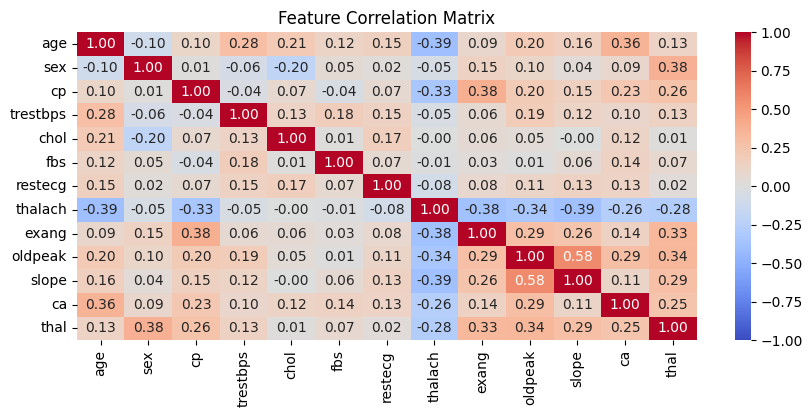

In [ ]:
corr_matrix = X.corr()

    # Display the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

# Labels in the Heart Disease Dataset

| **Label Value** | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| `0`              | No presence of heart disease (negative case).                                  |
| `1`              | Mild heart disease or minimal risk (positive case, low severity).              |
| `2`              | Moderate heart disease (positive case, medium severity).                      |
| `3`              | Severe heart disease (positive case, high severity).                          |

In [ ]:
y=y.map(lambda x: 1 if x in {1,2,3} else 0)
y.head()

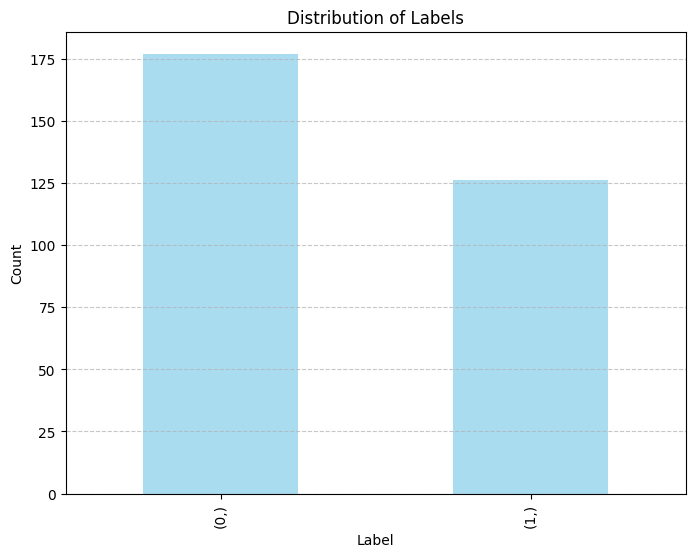

In [ ]:
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', alpha=0.7, color='skyblue')
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Compute the mean of features grouped by the labels

data = X.copy()
data['target'] = y
mean_table = data.groupby('target').mean()
del(data)
mean_table

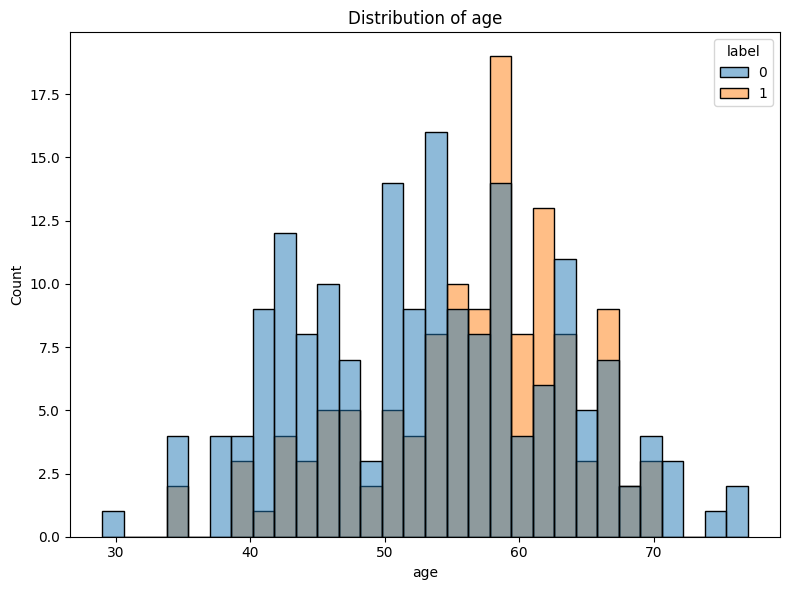

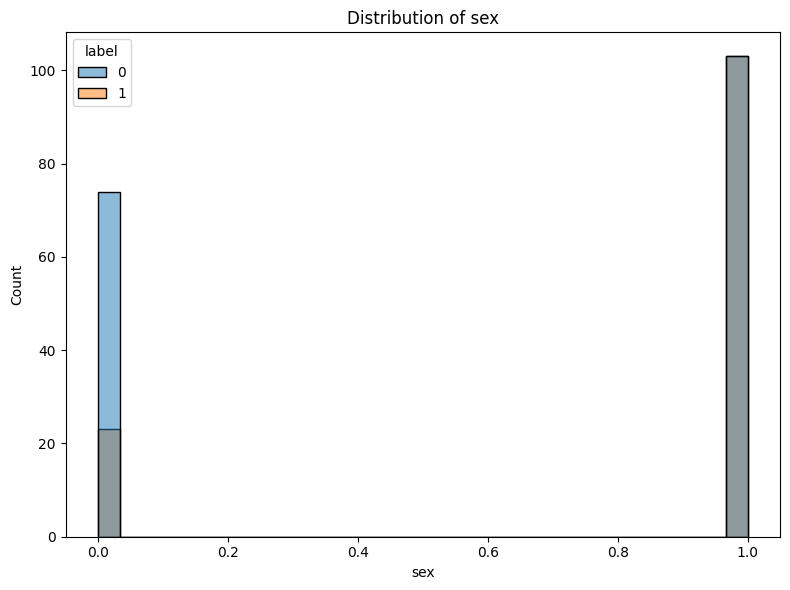

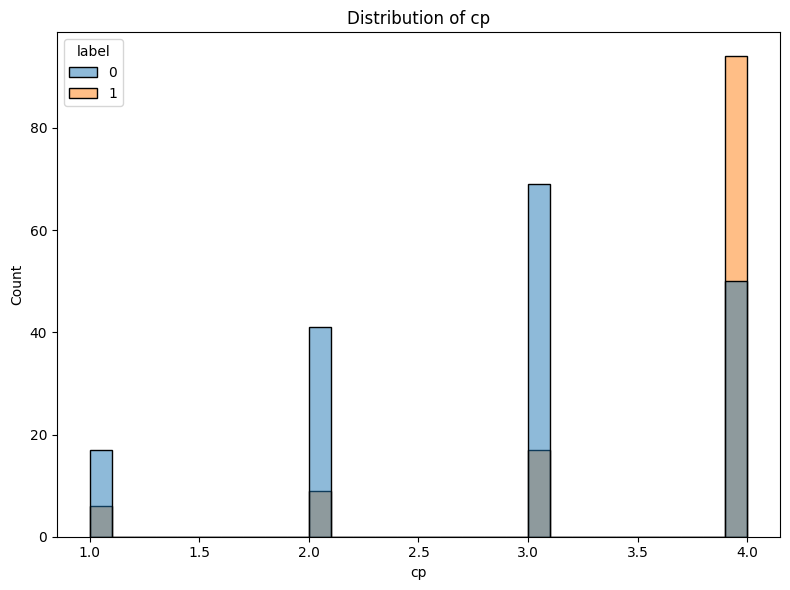

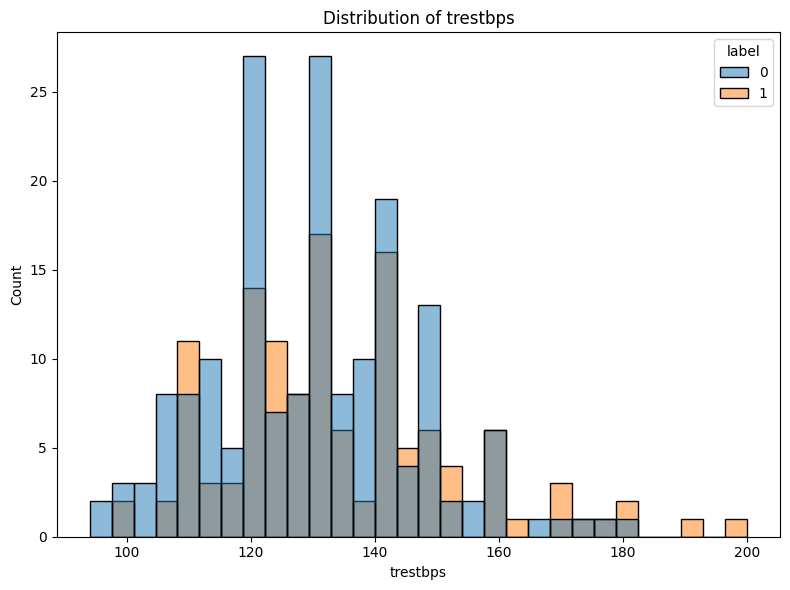

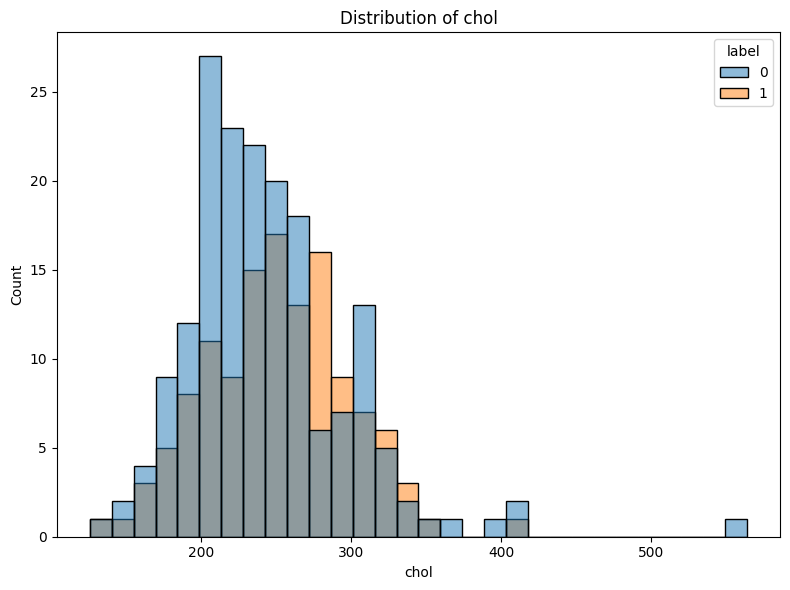

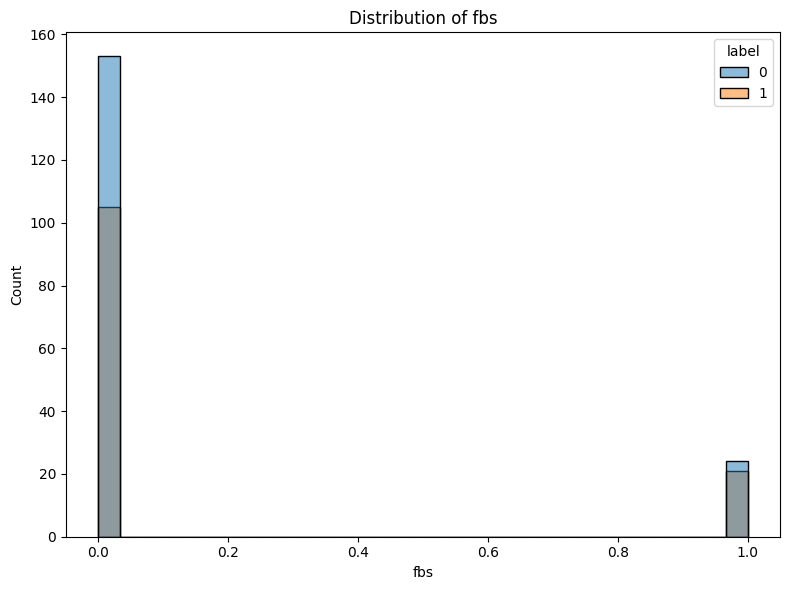

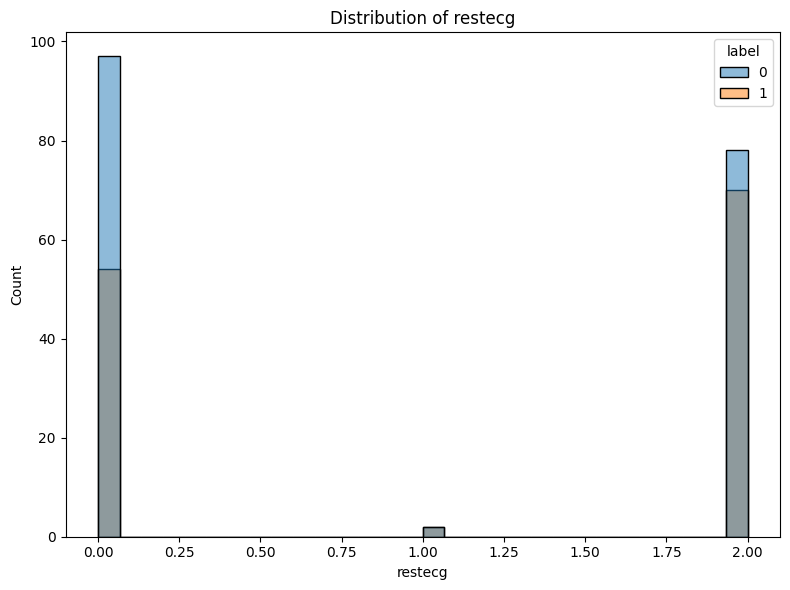

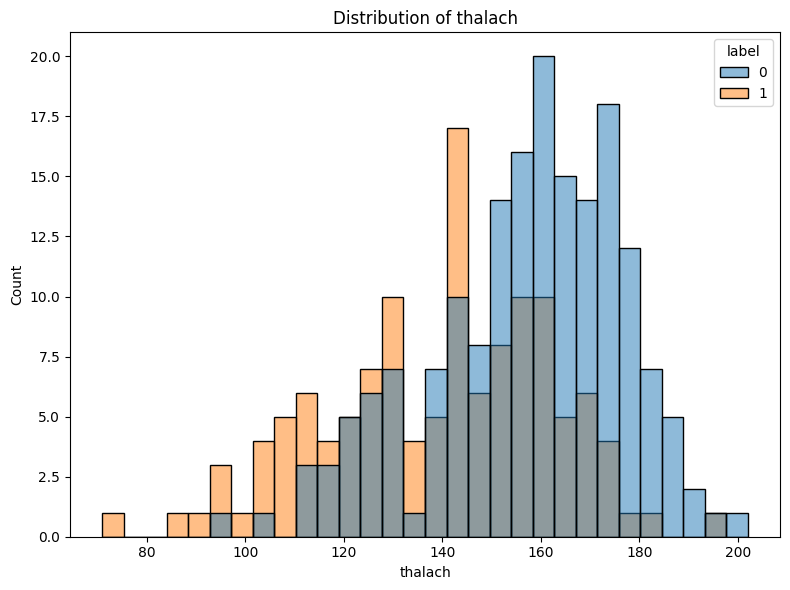

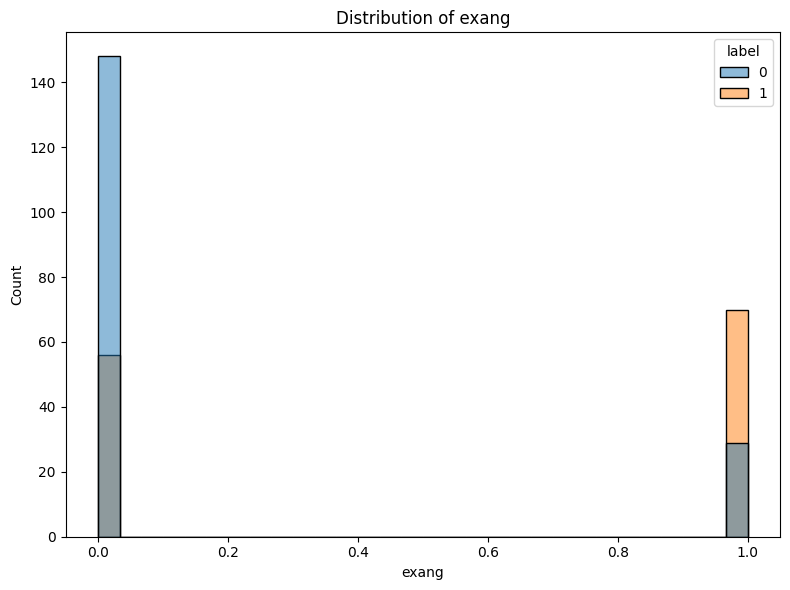

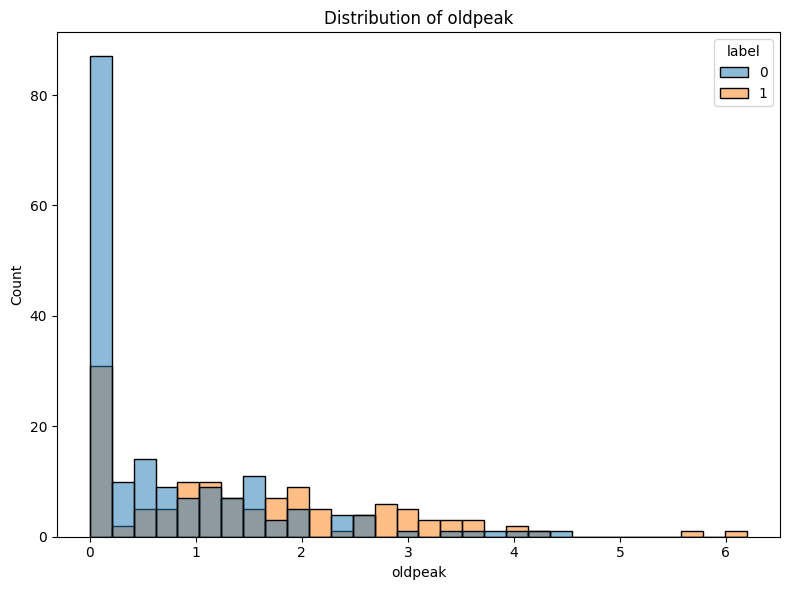

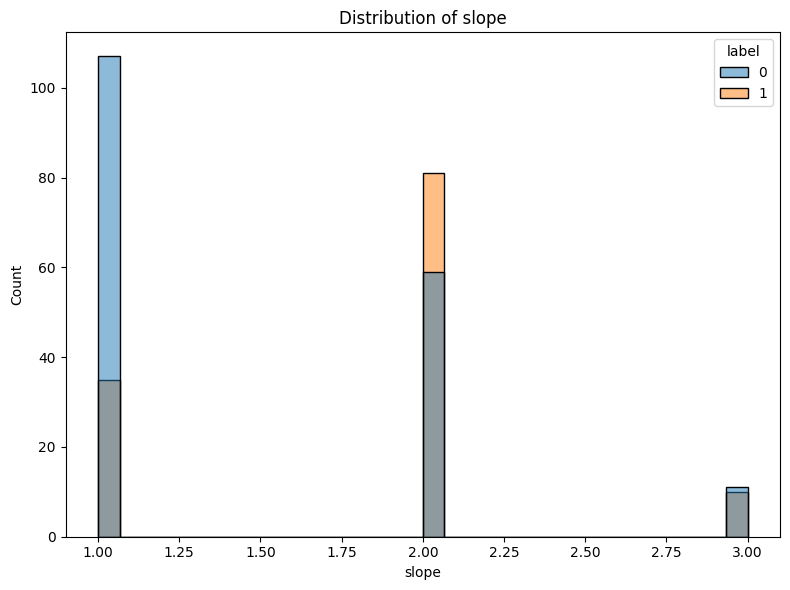

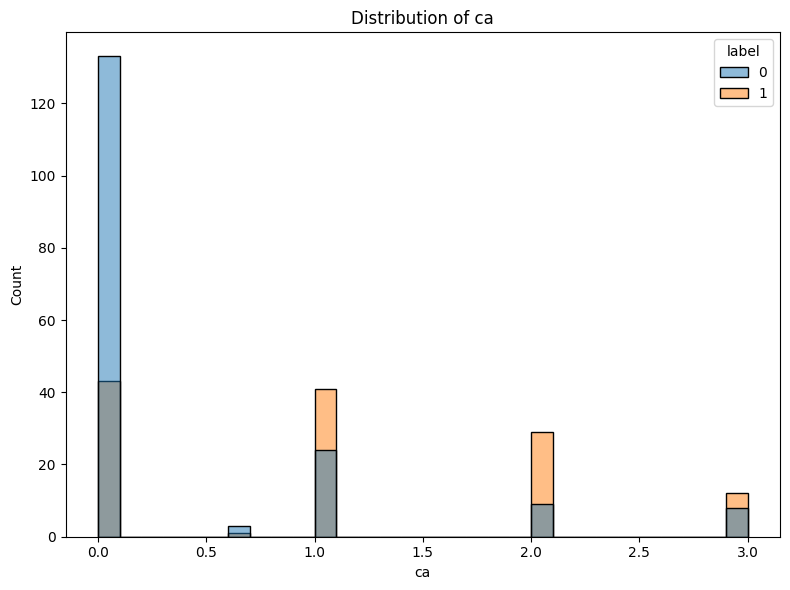

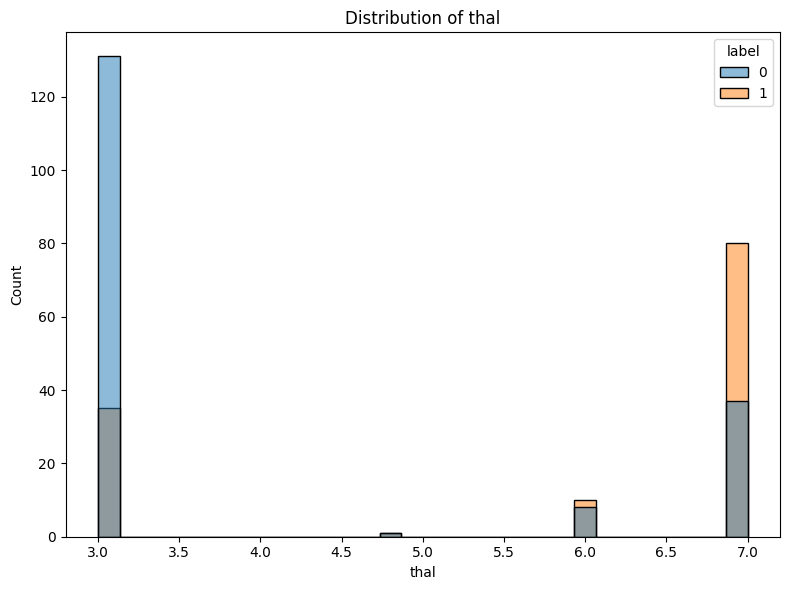

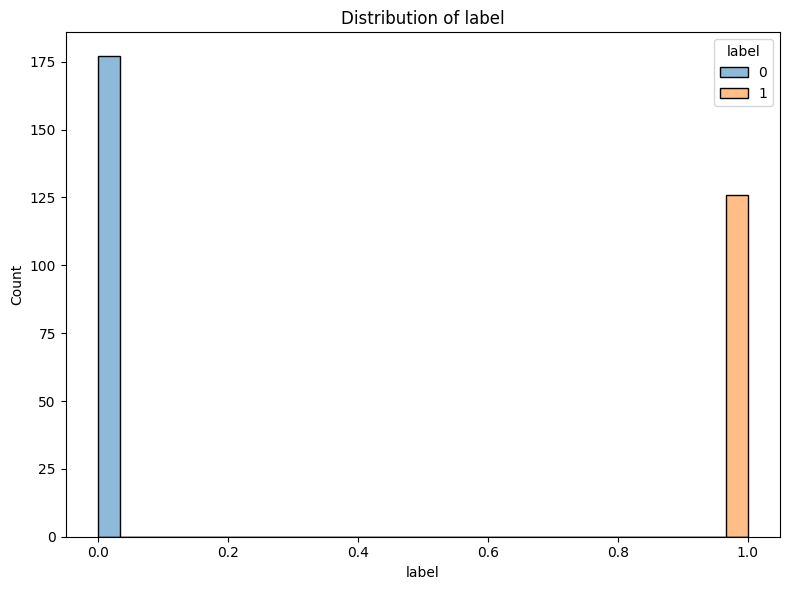

In [ ]:
plot_histograms(X,y)

# Split the Data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
#train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


#Use the test data to evaluate the model's performance.
y_pred= logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")

print(classification_report(y_test, y_pred))

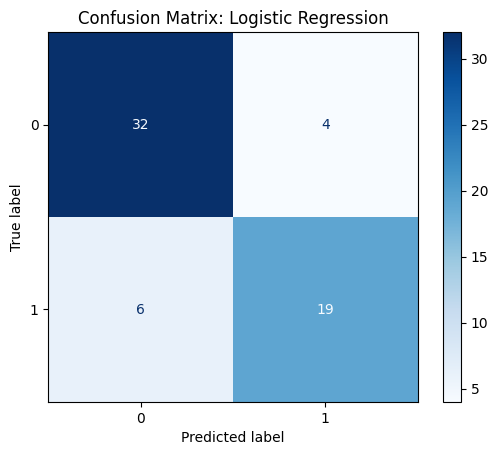

In [ ]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Interpreting logistic regression coefficient

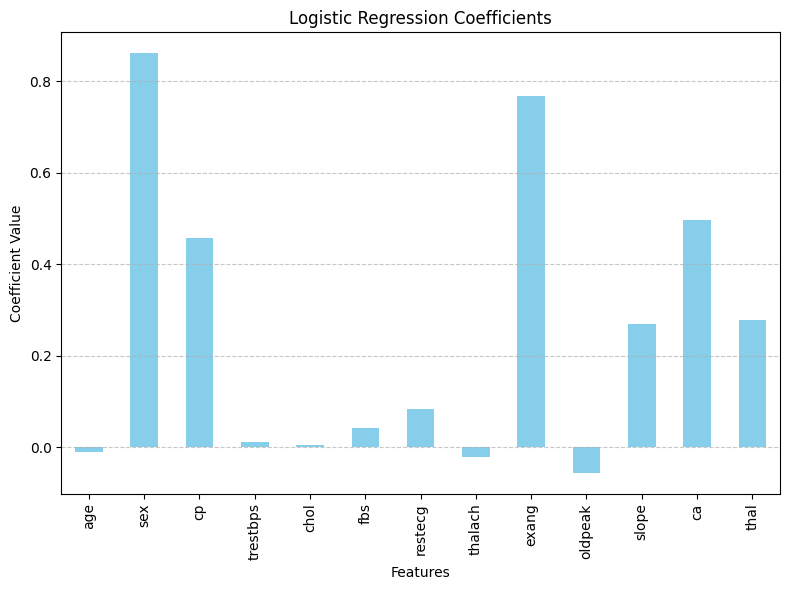

In [ ]:
plt.figure(figsize=(8, 6))
coefficients = pd.Series(logistic_model.coef_[0], index=X.columns)  # Extract coefficients
coefficients.plot(kind='bar', color='skyblue')  # Plot as a bar chart
plt.title("Logistic Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for readability
plt.tight_layout()
plt.show()

# Standardizing Data Using StandardScaler() for Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.83      0.76      0.79        25

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


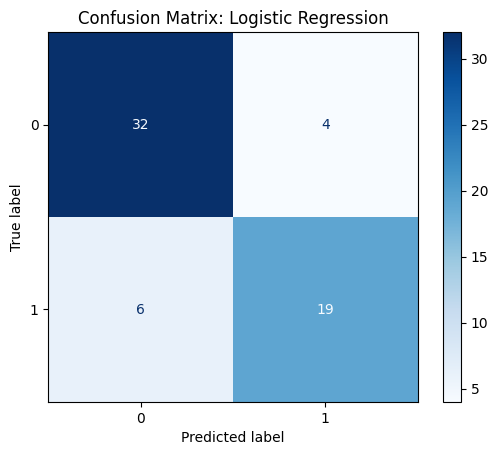

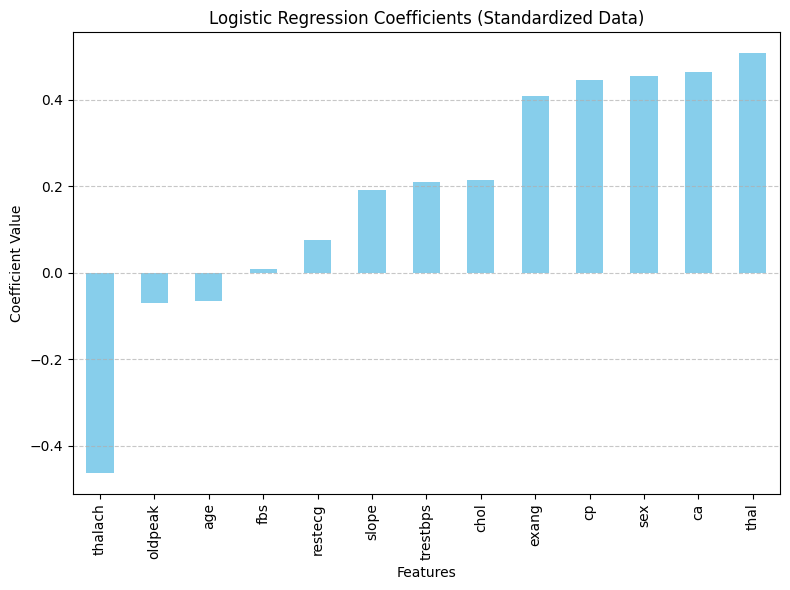

In [ ]:
from sklearn.preprocessing import StandardScaler
# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it
X_test_scaled = scaler.transform(X_test)       # Transform the test data using the same scaler

# Step 2: Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)  # Train the model on the standardized data

# Step 3: Evaluate the model
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_scaled, y_test, cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Step 5: Plot logistic regression coefficients
plt.figure(figsize=(8, 6))
coefficients = pd.Series(logistic_model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='bar', color='skyblue')
plt.title("Logistic Regression Coefficients (Standardized Data)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.80      0.80      0.80        25

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



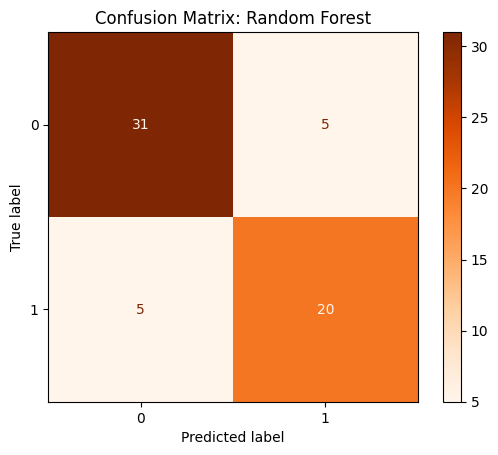

In [ ]:
# Predictions and report
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Oranges")
plt.title("Confusion Matrix: Random Forest")
plt.show()


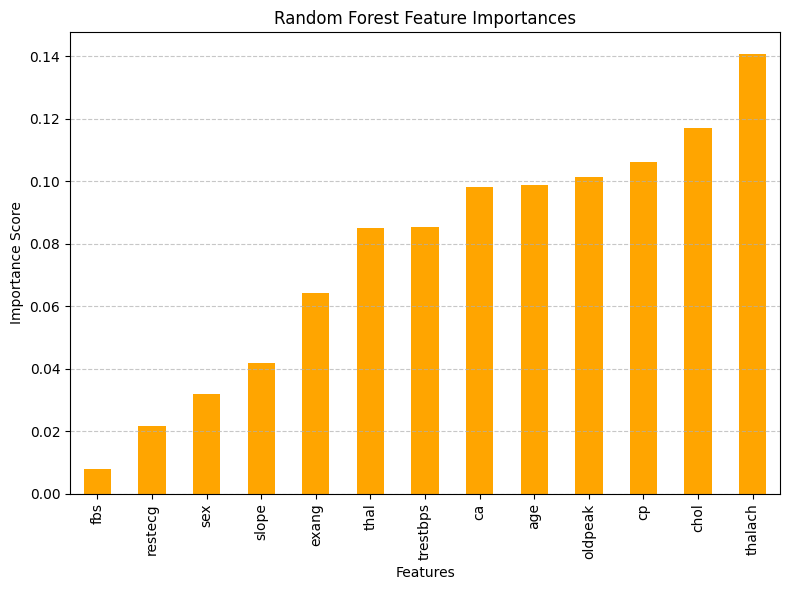

In [ ]:
# Plot feature importances
plt.figure(figsize=(8, 6))
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='bar', color='orange')
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X, y)

# Partial Dependence Plot

In [ ]:
feature_of_interest = "age"
grid_points = 50

# Create the grid for Feature1
Xs = np.linspace(X[feature_of_interest].min(), X[feature_of_interest].max(), grid_points)
print(f"First five samples of X_s: \n{Xs[:5]}")

# Initialize the array to store partial dependence values
partial_dependence = np.zeros(grid_points)

In [ ]:
temp_X = X.copy()

for n, xs in enumerate(Xs):

    temp_X[feature_of_interest] = xs  # Add the fixed Feature1 column
    # Predict using the model for all rows f(x)
    predictions = rf_model.predict_proba(temp_X)[:,1]
    # Store the mean prediction for this grid point
    partial_dependence[n] = predictions.mean()


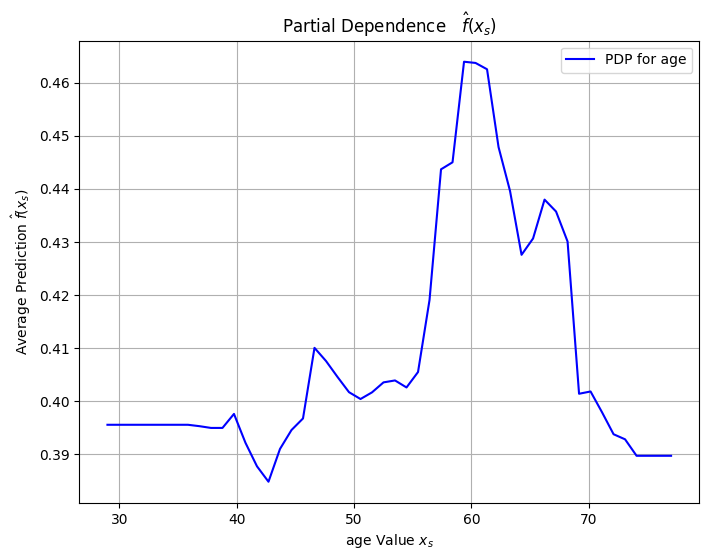

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(Xs, partial_dependence, label=f"PDP for {feature_of_interest}", color="blue")
plt.xlabel(f"{feature_of_interest} Value $x_s$")
plt.ylabel(f"Average Prediction $\hat{{f}}(x_s)$")
plt.title(f"Partial Dependence   $\hat{{f}}(x_s)$")
plt.legend()
plt.grid()
plt.show()

Processing Feature Index: 0, Feature Name: age


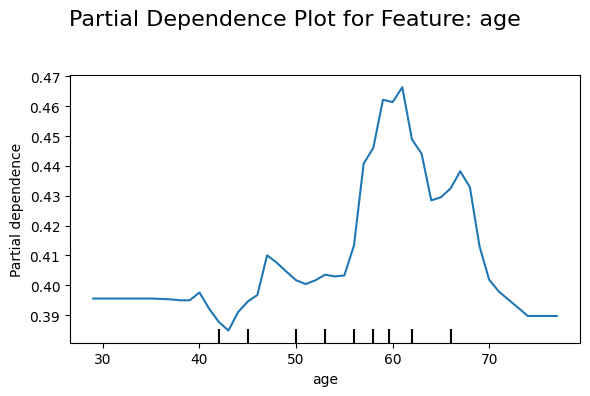

Processing Feature Index: 1, Feature Name: sex
Processing Feature Index: 2, Feature Name: cp


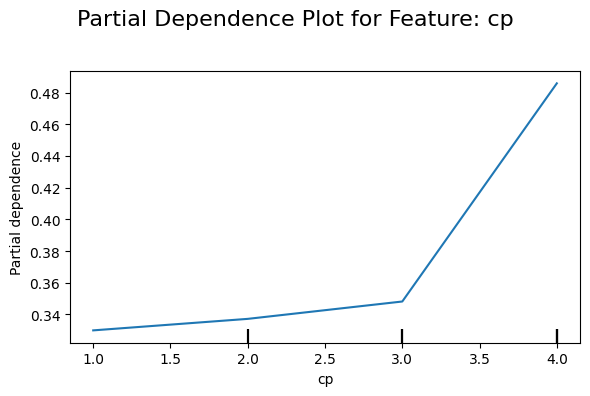

Processing Feature Index: 3, Feature Name: trestbps


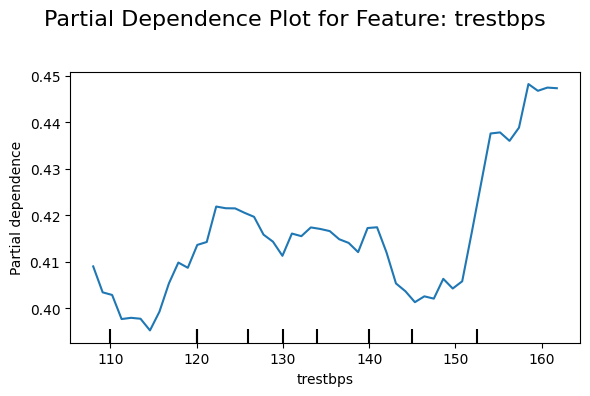

Processing Feature Index: 4, Feature Name: chol


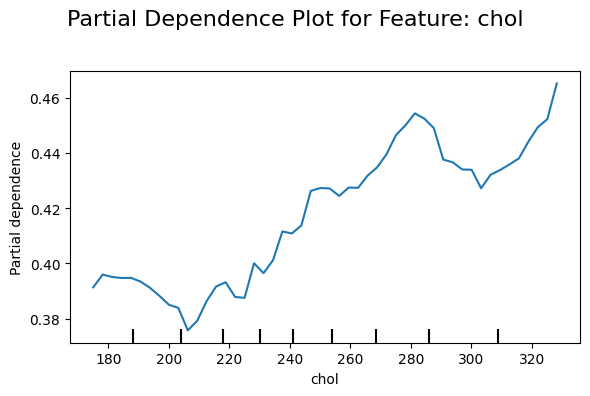

Processing Feature Index: 5, Feature Name: fbs
Processing Feature Index: 6, Feature Name: restecg


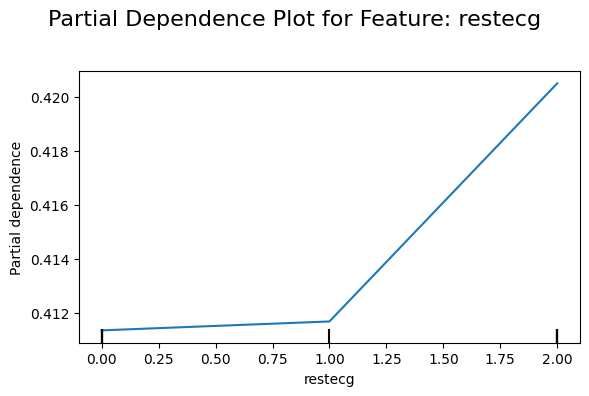

Processing Feature Index: 7, Feature Name: thalach


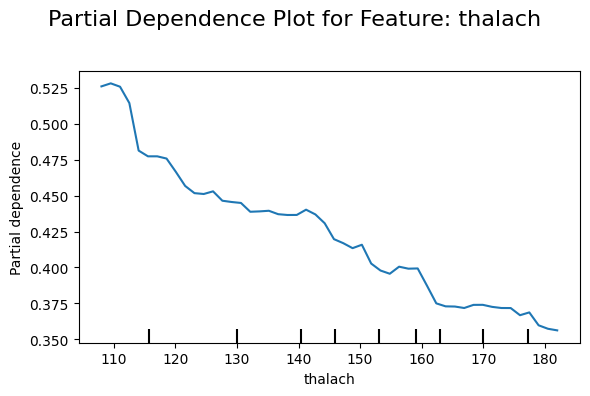

Processing Feature Index: 8, Feature Name: exang
Processing Feature Index: 9, Feature Name: oldpeak


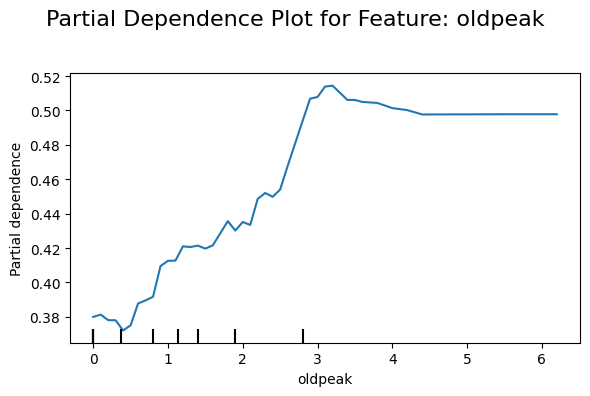

Processing Feature Index: 10, Feature Name: slope


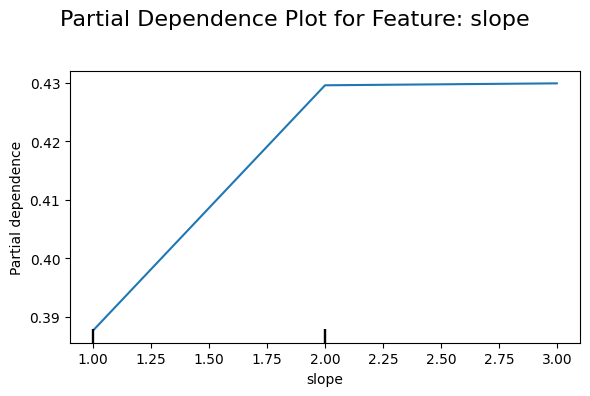

Processing Feature Index: 11, Feature Name: ca


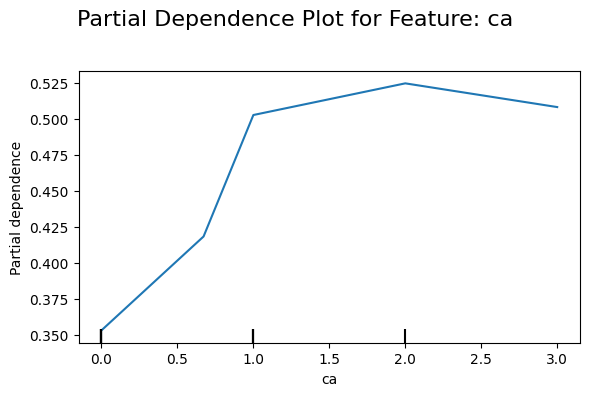

Processing Feature Index: 12, Feature Name: thal


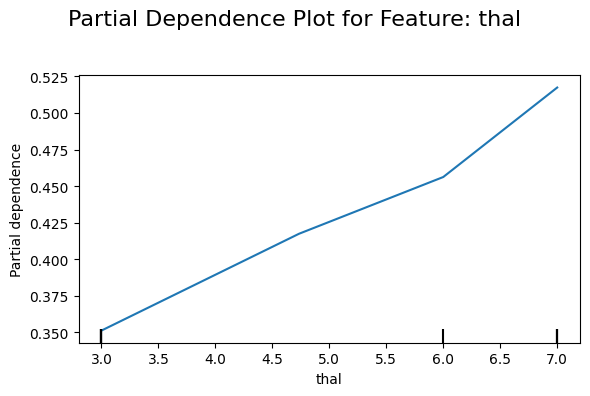

In [ ]:
# Verify feature names and indices
feature_names = X.columns

for i, feature_name in enumerate(feature_names):
    print(f"Processing Feature Index: {i}, Feature Name: {feature_name}")

    # Plot PDP for the feature
    if not(feature_name in ['sex', 'fbs', 'exang']):
        fig, ax = plt.subplots(figsize=(6,4))
        PartialDependenceDisplay.from_estimator(
            rf_model,
            X,
            features=[i],  # Use valid feature index
            feature_names=feature_names,
            grid_resolution=50,
            ax=ax
        )
        plt.suptitle(f"Partial Dependence Plot for Feature: {feature_name}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

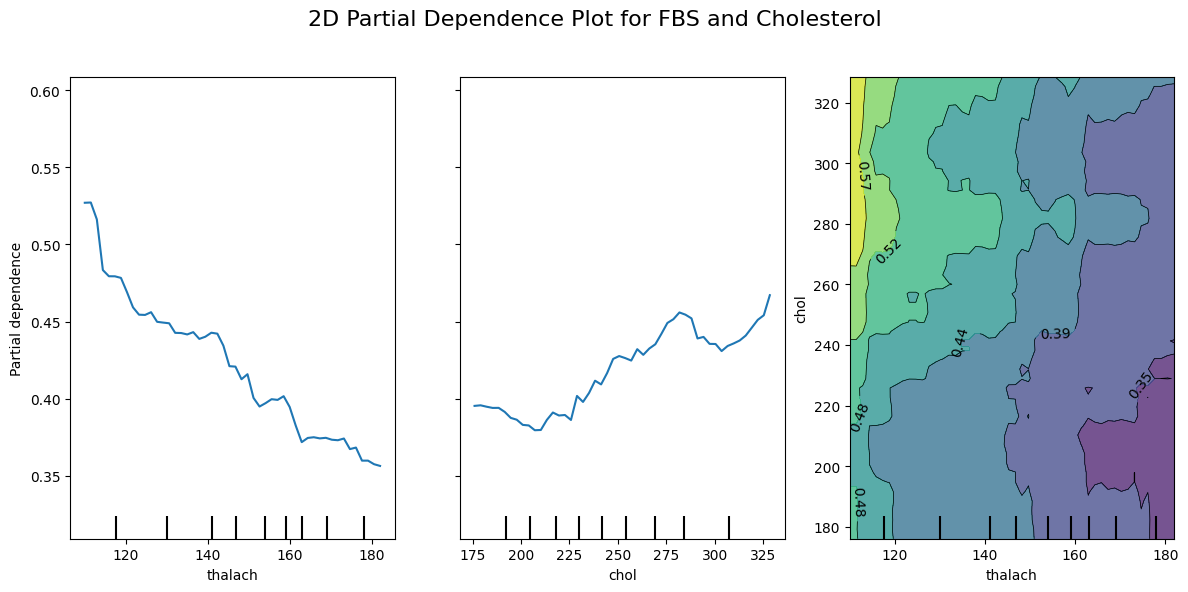

In [ ]:
# Define the features for the 2D PDP
features_to_plot = ['thalach', 'chol',('thalach', 'chol')]  # Fasting blood sugar and cholesterol

# Generate the 2D PDP
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_train,
    features=features_to_plot,
    grid_resolution=50,
    ax=ax,
)
plt.suptitle("2D Partial Dependence Plot for FBS and Cholesterol", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the title
plt.show()

# Visual Example

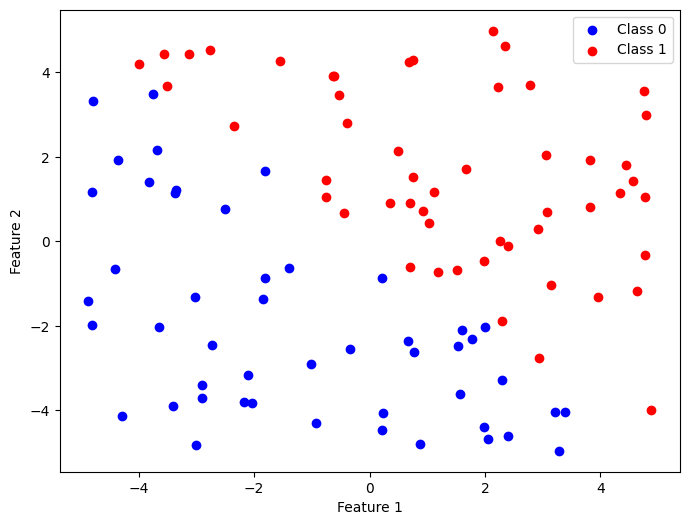

In [ ]:
def create_separable_data(beta_1, beta_2, n_samples=100, random_seed=0):
    np.random.seed(random_seed)

    # Generate random features
    X = 10*np.random.rand(n_samples, 2)-5   # Two features ranging from 0 to 10

    # Define the linear boundary: beta_1 * x1 + beta_2 * x2 = 0
    # Points for which beta_1 * x1 + beta_2 * x2 > 0 will be in class 1, otherwise class 0
    y = (beta_1 * X[:, 0] + beta_2 * X[:, 1] > 0).astype(int)
    return X, y
X, y = create_separable_data(beta_1=1, beta_2=1, n_samples=100, random_seed=0)

# Plot the points and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, y)

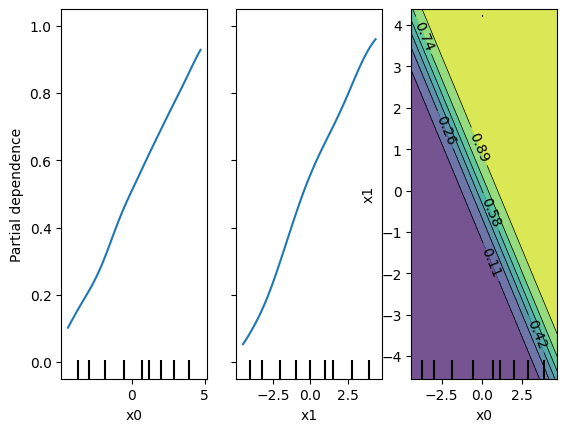

In [ ]:
PartialDependenceDisplay.from_estimator(clf, X, features=[0,1,(0,1)])
plt.show()
